In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
import pandas as pd

In [56]:
def sigmoid(x,x0,L,k):
    
    sig = []
    
    for item in x:
        value=L/(0.001+expit(-k*(item-x0)))
        sig.append(value)
    return sig

In [57]:
x=np.arange(-500,500,1)
sig=sigmoid(x,10,1e22,1)
tapered=np.cos(x)

(0, 500)

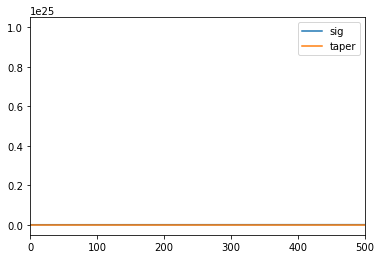

In [58]:
plt.plot(sig, label='sig')
plt.plot(tapered, label='taper')
plt.legend()
plt.xlim(0,500)

In [3]:
def bru_sine(time, amplitude, tau, tp, omega_real, phase, **kwargs):
    
    """
    returns damped complex sine as h (type=array) 
    assumes that tau is negative number

    """
    
    
    h = np.zeros(len(time), dtype=np.complex128)
    tidx = time >= tp
    
    damp_arg = (time[tidx])/tau
    sin_arg = (omega_real * (time[tidx])) - phase
    h[tidx] = amplitude*np.exp(damp_arg) * np.exp((1j*sin_arg)) 
   
    return h

In [4]:
def create_bru_values(m_odd, em, M, a, n_ref):
    
    """ 
    m_odd is odd integer, g_s is string coupling (GR == 1), em is 2,
    M is total mass, a is dimensionless spin, and amplitude_qnm is 
    the amplitude of the mode of interest 
    
    returns amplitude (quantum), omega_real, tau, and tp
    
    """
    
    g_s = 1/n_ref
    c = 3e8
    G = 6.67e-11
    Msun = 1.989e30
    
    conversion_w = (c**3)/(G * M * Msun)
    R_con = (2 * G * M * Msun) / (c**2)
    
    r_s = (R_con + np.sqrt((R_con**2) - 4*(a**2)))/2 #units m
    omega_real = (m_odd * np.pi /(2 * r_s * n_ref)) * c   #units 1/m --> 1/s
    omega_im = - (1/r_s) * (1/(n_ref**2)) * c
    
    tau = 1/omega_im
    tp = 1/omega_real 
    
    print("Q freq is {}".format(omega_real/(2*np.pi)))
    print("Q tau is {}".format(tau))
    
    return {'tau': tau, 'freq': (omega_real/(2*np.pi))}

In [61]:
bru_values = create_bru_values(1, 2, 30, 0, 7)

Q freq is 121.14175620657674
Q tau is -0.014445886000000002


In [62]:
time=np.arange(-2,2,1/4096)

In [63]:
h=bru_sine(time=time, amplitude=1e22, phase=0, tau=bru_values['tau_Q'], tp=bru_values['tp_Q'], 
                omega_real=bru_values['omega_real_Q'])

0.0013137909509954328


(-0.05, 0.01)

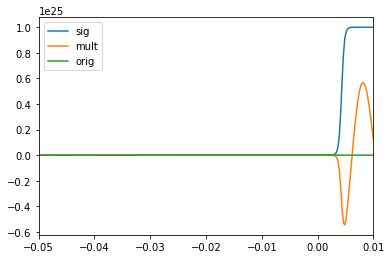

In [64]:
#plt.plot(time, brusinreg.real,label='reg')
sigtp=sigmoid(time, x0=bru_values['tp_Q']*2, L=1e22, k=4096)
print(bru_values['tp_Q'])
plt.plot(time, sigtp,label='sig')
plt.plot(time, h.real*sigtp/1e22, label='mult')
plt.plot(time, h.real, label='orig')
plt.legend()
plt.xlim(-0.05,0.01)

In [8]:
M=[100, 80, 60, 50, 40]
n_ref=[3, 5, 7, 9, 11]
df=pd.DataFrame(columns=['n_ref', 'mass', 'frequency', 'tau'])
for i in range(5): 
    mass=M[i]
    n=n_ref[i]
    bru_values=create_bru_values(m_odd=1, em=0, M=mass, a=0, n_ref=n)
    freq=bru_values['freq']
    tau=bru_values['tau']
    df=df.append({'n_ref':n, 'mass':mass, 'frequency':freq, 'tau':tau}, ignore_index=True)

df

Q freq is 84.79922934460372
Q tau is -0.00884442
Q freq is 63.59942200845278
Q tau is -0.019654266666666663
Q freq is 60.57087810328837
Q tau is -0.028891772000000003
Q freq is 56.53281956306914
Q tau is -0.039799890000000004
Q freq is 57.817656371320716
Q tau is -0.04756332533333332


,n_ref,mass,frequency,tau
0,3.0,100.0,84.799229,-0.008844
1,5.0,80.0,63.599422,-0.019654
2,7.0,60.0,60.570878,-0.028892
3,9.0,50.0,56.532820,-0.039800
4,11.0,40.0,57.817656,-0.047563
